# Brief 10 - Labyrinthe  
Contenu du rendu:  
ce fichier:  
    * brief10-rendu.ipynb  
      
fichier fonctions de parcours de graphe:  
    * fctgraphes.py  
    
labyrinthe sous forme de fichier image:  
    * lab01.png,  
    * lab02.png,  
    * lab03.png  
    

## Tracer du labyrinthe  
On utilisera le code (en le modifiant pour extraire notamment un graphe sous forme de dictionnaire)  
Source:  
http://math.univ-lyon1.fr/irem/Formation_ISN/formation_parcours_graphes/profondeur/3_python2.html

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

import networkx as nx

import fctgraphes as fg

import copy

import cv2



In [2]:
# Dimensions de la grille:
LARGEUR = 10
HAUTEUR = 10
TAILLE_LARG= 2 * LARGEUR + 1
TAILLE_HAUT= 2 * HAUTEUR + 1

random.seed(4) # Graphe de référence

class Maillon:

    def __init__(self, valeur, suivant=None):
        self.valeur = valeur
        self.suivant = suivant



class Pile:

    def __init__(self):
        self.taille = 0 # nombre d'assiettes dans la pile
        self.sommet = None


    def empiler(self, valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1

    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet = self.sommet.suivant
            self.taille -= 1
            return valeur

    def estVide(self):
        return self.taille == 0


    def lireSommet(self):
        return self.sommet.valeur








def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    i, j = couple[0], couple[1]

    #print(f"fct voisinage / avant boucle for: i: {i} j: {j} couple: {couple}")

    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
        
        #print(f"fct voisinage / boucle for: i: {i} j: {j} d: {d} i+d:{i+d} j+d:{j+d}")

    #print(f"fct voisinage / aprés boucle for: i: {i} j: {j} listeVoisin: {listeVoisins}\n")
    #dic[couple]= listeVoisins
    
    return listeVoisins




def dfs(s) :
    P = {s: None}
    Q = Pile()
    Q.empiler(s)
    while not(Q.estVide()) :
        u = Q.lireSommet()
        R=[y for y in voisinage(u) if y not in P]
        if R :
            v=random.choice(R)
            P[v]=u
            Q.empiler(v)
        else :
            Q.depiler()
    return P



def dedale(entree, sortie):
    """
    Fonction dessinant le résultat 
    """
    labyrinthe = [ [0 for j in range(TAILLE_LARG)] for i in range(TAILLE_HAUT)]
    parcours = dfs((0,0))

    #print(f"fct dedale: parcours: \n {parcours}")

    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 1
        #arbre[(2*i+1,2*j+1)]= 'A'
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 1
            labyrinthe[i+k+1][j+l+1] = 1
            #arbre[2*k+1,2*l+1]= 'B'
            #arbre[i+k+1,j+l+1]= 'C'

    labyrinthe[entree[0]][entree[1]] = 1
    #depart= (1,0)
    labyrinthe[sortie[0]][sortie[1]]= 1 #TAILLE_HAUT - 2][TAILLE_LARG - 1] = 1
    #arrive= (TAILLE_HAUT - 2,TAILLE_LARG - 1)
    
    return labyrinthe

def dessine(lab):
    # le graphique:
    plt.figure(figsize= (10,10))
    plt.imshow(lab)

    # on cache les graduations:
    plt.xticks([])
    plt.yticks([])

    # on visualise le résultat:
    #plt.show()
    #print(lab)
    noeud= []
    for index, x in np.ndenumerate(lab):
        #print("index: ",index[0], index[1], x)   
        if x== 1: #labyrinthe[index[0], index[1]]
            noeud.append((index[0], index[1]))   
            #print("\tnoeud !",index[0], index[1])   

    return noeud


def affiche_dic_de_dic(dic):
    for cle, valeur in dic.items():
        print(f"{cle}: {valeur}")




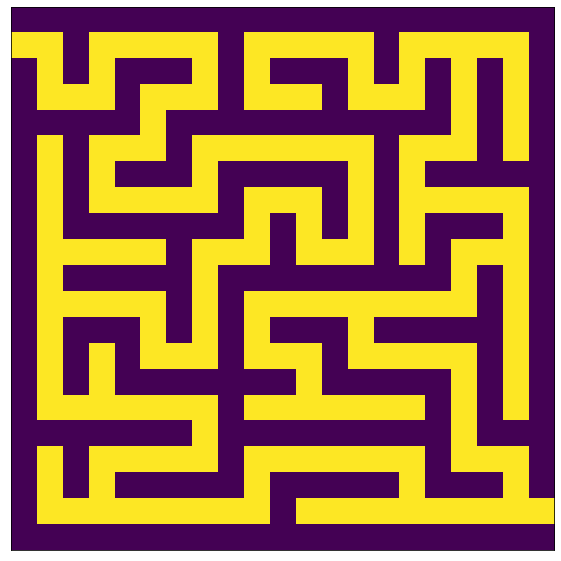

In [3]:
depart_labyrinthe= (1,0)
arrive_labyrinthe= (TAILLE_HAUT - 2,TAILLE_LARG - 1)
labyrinthe= dedale(depart_labyrinthe, arrive_labyrinthe)
noeud_bourin= dessine(labyrinthe)


In [4]:
print(f"Liste des noeuds:\n{noeud_bourin}\nLe départ du labyrinthe se fait au point: {depart_labyrinthe}\n\
L'arrivé est le point: {arrive_labyrinthe}")

Liste des noeuds:
[(1, 0), (1, 1), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 1), (2, 3), (2, 7), (2, 9), (2, 13), (2, 15), (2, 17), (2, 19), (3, 1), (3, 2), (3, 3), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 13), (3, 14), (3, 15), (3, 17), (3, 19), (4, 5), (4, 17), (4, 19), (5, 1), (5, 3), (5, 4), (5, 5), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 15), (5, 16), (5, 17), (5, 19), (6, 1), (6, 3), (6, 7), (6, 13), (6, 15), (7, 1), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 9), (7, 10), (7, 11), (7, 13), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (8, 1), (8, 9), (8, 11), (8, 13), (8, 15), (8, 19), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 7), (9, 8), (9, 9), (9, 11), (9, 12), (9, 13), (9, 15), (9, 17), (9, 18), (9, 19), (10, 1), (10, 7), (10, 17), (10, 19), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 7), (11, 9), (11, 10), (11, 11), (11, 12), (11, 13), (11, 

## Construction de dictionnaires représentant le labyrinthe sous forme de graphe.  
  
**2 dictionnaires sont générés**: Un dictionnaire de liste et un dictionnaire de dictionnaire qui sera utilisé dans les différentes fonctions de graphe graphe codé précédemment et regroupé dans le fichier "fctgraphe.py".  
  
Le graphe représentant le labyrinthe est alors affiché. On voit clairement que ce graphe n'est pas optimum et  peu lisible. Pour avoir une **meilleure représentation** et une **efficacité accru** dans la résulution du labyrinthe il serait souhaitable de "compresser" la représentation du graphe en éliminant les noeuds qui n'ont qu'un seul prédécesseur et qu'un seul successeur.  
  
Pour prendre une image routière, quand nous sommes sur la route et sans embranchement et il n'est pas utile de dire au "conducteur" de rester sur la route !!! Sauf, bien sûr, si l'objectif est de lui casser les pompons.... !  

Mais voila, pour éviter l'effet "casse pompons", il faut être capable de transformer le dictionnaire en un dictionnaire plus concis, puis repasser du dictionnaire concis en dictionnaire casse pompons, dont l'utilisation est plus simple lorsqu'il s'agira de tracer la route.  
    
Pour l'instant, je reste sur le dictionnaire simple mais, si j'ai un peu de temps il faudra réfléchir à cette question.

In [5]:
def construit_dictionnaire(nd):
    dic= {} # dictionnaire de liste sans le poids
    dic2= {} # dictionnaire de dictionnaire avec poids
    
    for n in nd:
        # On recherchera les voisins du noeud n disponible (Il y a 4 voisins sauf sur les bords )
        # 
        voisins=[]
        voisdic={}
        lig= n[0]
        col= n[1]
        for d in (-1, 1):
            #print(d,lig,col,lig+d,col+d)
            if -1 < lig+d < TAILLE_HAUT:
                #print(f"if 1: n: {n} d: {d}, lig: {lig}, col: {col}, lig+d: {lig+d}, col: {col}")
                if (lig+d, col) in nd:
                    #print(f"(lig+d, col): {lig+d} {col} bingo")
                    voisins.append( (lig+d, col) )
                    voisdic[(lig+d, col)]= 1
            if  -1 < col+d < TAILLE_LARG:
                #print(f"if 2: n: {n} d: {d}, lig: {lig}, col: {col}, lig+d: {lig+d}, col: {col}")
                if (lig, col+d) in nd:
                    #print(f"(lig, col+d): {lig} {col+d} bingo 2")
                    voisins.append( (lig, col+d) )
                    voisdic[(lig, col+d)]= 1
        #print(n[0], n[1], voisins)
        dic[n]= voisins
        dic2[n]= voisdic
    return dic, dic2

dic_liste, dic_dic= construit_dictionnaire(noeud_bourin)

#affiche_dic_de_dic(dic_dic)


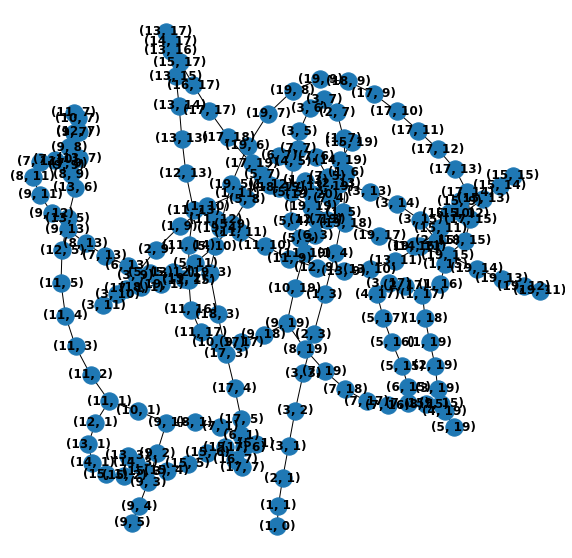

In [6]:
g= nx.Graph()

# On construit le graphe noeud par noeud
for cle, valeur in dic_dic.items():
    for k,v in valeur.items():
        g.add_edge(cle,k,weight= v)

f, ax = plt.subplots(figsize=(10,10))
nx.draw(g, ax = ax, with_labels=True, font_weight='bold')

plt.draw()  # pyplot draw()

In [7]:
# Attention, le "shortest" ne prend pas en compte les poids par défaut: 
#  shortest_path(G, source=None, target=None, weight=None)
#  Ce n'est pas un problème avec le graphe en mode "casse pompons" mais si on venait à utiliser un
#  graphe compressé, il faudrait en tenir compte

route_nx= nx.shortest_path(g, depart_labyrinthe, arrive_labyrinthe, weight= True)
print(f"La route selon shortest de nx:\n{route_nx}")

l_route_dijkstra, route_dijkstra = fg.dij_rec(dic_dic,depart_labyrinthe,arrive_labyrinthe)
print(f"\nPlus court selon dijkstra du dictionnaire: \n{dic_dic}:\n\nEst le chemin : \n\
{route_dijkstra}\n\nDe longueur : {l_route_dijkstra}")


La route selon shortest de nx:
[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (3, 6), (3, 5), (4, 5), (5, 5), (5, 4), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (6, 13), (7, 13), (8, 13), (9, 13), (9, 12), (9, 11), (8, 11), (7, 11), (7, 10), (7, 9), (8, 9), (9, 9), (9, 8), (9, 7), (10, 7), (11, 7), (12, 7), (13, 7), (13, 6), (13, 5), (12, 5), (11, 5), (11, 4), (11, 3), (11, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (15, 7), (16, 7), (17, 7), (17, 6), (17, 5), (17, 4), (17, 3), (18, 3), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (19, 8), (19, 9), (18, 9), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (17, 14), (17, 15), (18, 15), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19), (19, 20)]

Plus court selon dijkstra du dictionnaire: 
{(1, 0): {(1, 1): 1}, (1, 1): {(1, 0): 1, (2, 1): 1}, 

In [8]:
# On peu sauvegarder la matrice obtenu sous forme d'image
_= cv2.imwrite("test.png", np.array(labyrinthe)) # Affectation pour éviter l'affichage

## Tracer le chemin obtenu

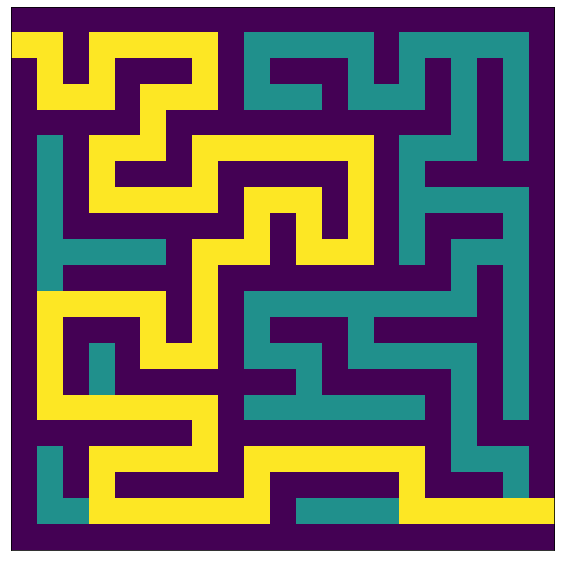

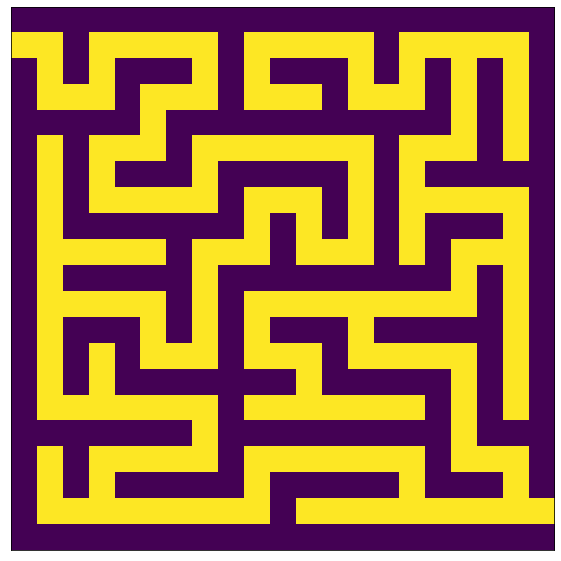

In [9]:
lab= copy.deepcopy(labyrinthe) # On ne modifie pas labyrinthe

#route= route_dijkstra
route= route_nx
for i,j in route:
    #print(i,j, route_dijkstra)
    lab[i][j]= 2
#dessine(labyrinthe)
_= dessine(lab) # l'affectation évite l'affichage de la valeur retour de dessine
_= dessine(labyrinthe) # l'affectation évite l'affichage de la valeur retour de dessine


## Importation d'un labyrinthe crée à partir d'un logiciel d'image  
Fichier labxx.png  
Le fichier lab01 fait planté Dijkstra, le lab02 plante les 2 algo. Pour des labyrinthes ne respectant pas des règles strictes (1 pixel de large, pas de rebouclage,...) Il vaudrait mieux développer d'autres algos plus spécifiques au labyrinthe.

In [15]:
img= cv2.imread("lab01.png", cv2.IMREAD_GRAYSCALE )

#print(img)
# On transforme l'image en une matrice binaire. CODE A RETRAVAILLER AVEC COMPREHENSION LISTE
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 200:
            img[i][j]= 0
        else: img[i][j]= 1

#print(img)
img.shape

(21, 23)

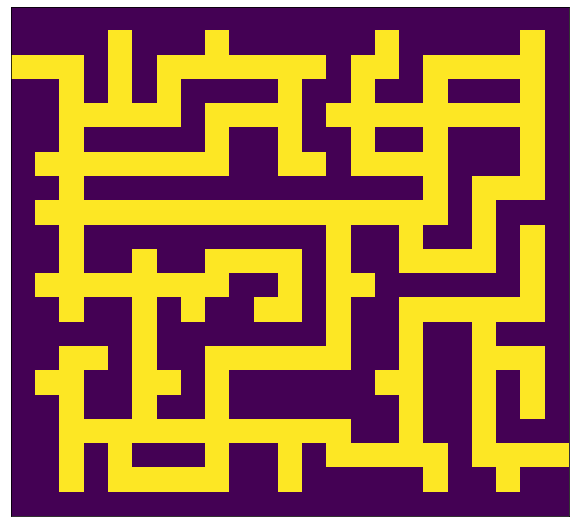

In [16]:
#img = cv2.imread("lab010.png")
#plt.imshow(img, cmap= "gray")
#img[2][0]= 2
#img[18][22]= 3

noeud_img= dessine(img)

In [18]:
depart_labyrinthe_img= (2,0)
arrive_labyrinthe_img= (18,22)
dic_liste_img, dic_dic_img= construit_dictionnaire(noeud_img)

dic_dic_img[(18,22)]= {(18,21): 1} # Sinon plantage..... le chemin de retour doit être mensionné ....!!!

affiche_dic_de_dic(dic_dic_img)


(1, 4): {(2, 4): 1}
(1, 8): {(2, 8): 1}
(1, 15): {(2, 15): 1}
(1, 21): {(2, 21): 1}
(2, 0): {(2, 1): 1}
(2, 1): {(2, 0): 1, (2, 2): 1}
(2, 2): {(2, 1): 1, (3, 2): 1}
(2, 4): {(1, 4): 1, (3, 4): 1}
(2, 6): {(3, 6): 1, (2, 7): 1}
(2, 7): {(2, 6): 1, (2, 8): 1}
(2, 8): {(1, 8): 1, (2, 7): 1, (2, 9): 1}
(2, 9): {(2, 8): 1, (2, 10): 1}
(2, 10): {(2, 9): 1, (2, 11): 1}
(2, 11): {(2, 10): 1, (3, 11): 1, (2, 12): 1}
(2, 12): {(2, 11): 1}
(2, 14): {(3, 14): 1, (2, 15): 1}
(2, 15): {(1, 15): 1, (2, 14): 1}
(2, 17): {(3, 17): 1, (2, 18): 1}
(2, 18): {(2, 17): 1, (2, 19): 1}
(2, 19): {(2, 18): 1, (2, 20): 1}
(2, 20): {(2, 19): 1}
(2, 21): {(1, 21): 1, (2, 20): 1, (3, 21): 1}
(3, 2): {(2, 2): 1, (4, 2): 1}
(3, 4): {(2, 4): 1, (4, 4): 1}
(3, 6): {(2, 6): 1, (4, 6): 1}
(3, 11): {(2, 11): 1, (4, 11): 1}
(3, 14): {(2, 14): 1, (4, 14): 1}
(3, 17): {(2, 17): 1, (4, 17): 1}
(3, 21): {(2, 21): 1, (4, 21): 1}
(4, 2): {(3, 2): 1, (5, 2): 1, (4, 3): 1}
(4, 3): {(4, 2): 1, (4, 4): 1}
(4, 4): {(3, 4): 1, (4, 3)

La route selon shortest de nx:
[(2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (11, 3), (11, 4), (11, 5), (12, 5), (13, 5), (14, 5), (15, 5), (16, 5), (17, 5), (17, 6), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (18, 13), (18, 14), (18, 15), (18, 16), (17, 16), (16, 16), (15, 16), (14, 16), (13, 16), (12, 16), (12, 17), (12, 18), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19), (18, 20), (18, 21), (18, 22)]


'\nl_route_dijkstra_img, route_dijkstra=img = fg.dij_rec(dic_dic_img,depart_labyrinthe_img,arrive_labyrinthe_img)\nprint(f"\nPlus court selon dijkstra du dictionnaire: \n{dic_dic_img}:\n\nEst le chemin : \n{route_dijkstra_img}\n\nDe longueur : {l_route_dijkstra_img}")\n'

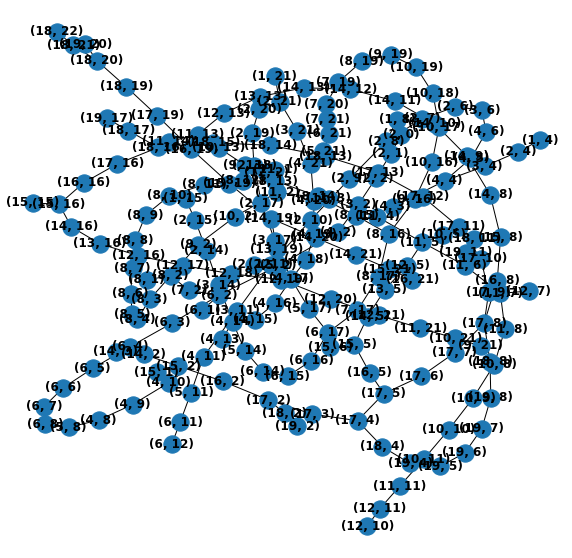

In [19]:
g_img= nx.Graph()
# On construit le graphe noeud par noeud
for cle, valeur in dic_dic_img.items():
    for k,v in valeur.items():
        g_img.add_edge(cle,k,weight= v)

f, ax = plt.subplots(figsize=(10,10))
nx.draw(g_img, ax = ax, with_labels=True, font_weight='bold')

plt.draw()  # pyplot draw()

route_nx_img= nx.shortest_path(g_img, depart_labyrinthe_img, arrive_labyrinthe_img, weight= True)
print(f"La route selon shortest de nx:\n{route_nx_img}")

# BUG sur Dijkstra : KeyError: (1, 21)

"""
l_route_dijkstra_img, route_dijkstra=img = fg.dij_rec(dic_dic_img,depart_labyrinthe_img,arrive_labyrinthe_img)
print(f"\nPlus court selon dijkstra du dictionnaire: \n{dic_dic_img}:\n\nEst le chemin : \n\
{route_dijkstra_img}\n\nDe longueur : {l_route_dijkstra_img}")
"""


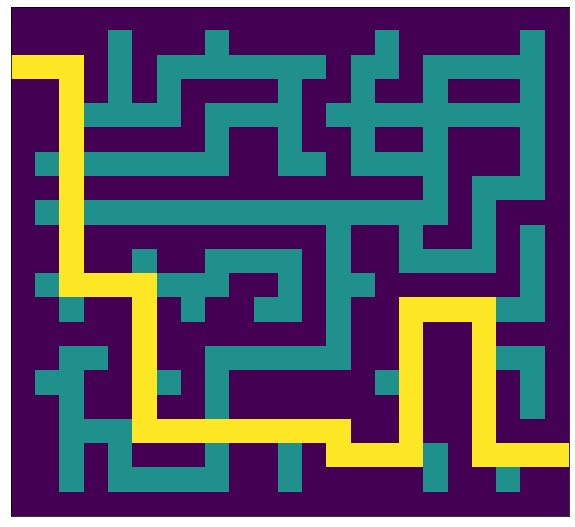

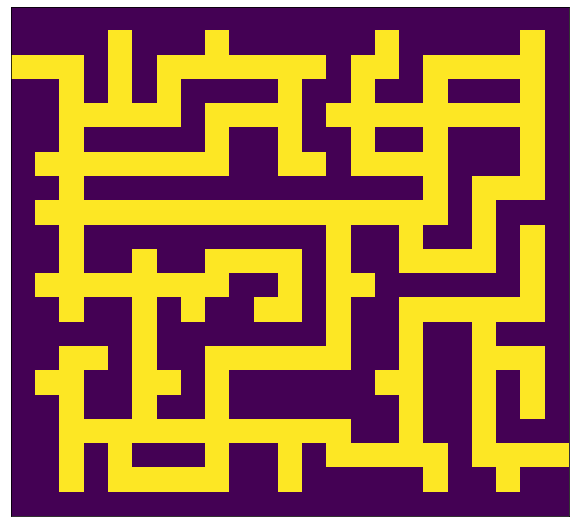

In [20]:
lab2= copy.deepcopy(img) # On ne modifie pas labyrinthe

#route= route_dijkstra
route= route_nx_img
for i,j in route:
    #print(i,j, route_dijkstra)
    lab2[i][j]= 2
#dessine(labyrinthe)
_= dessine(lab2) # l'affectation évite l'affichage de la valeur retour de dessine
_= dessine(img) # l'affectation évite l'affichage de la valeur retour de dessine


## Variation autour du labyrinthe